# Fake News Detection Using Machine Learning  
### Logistic Regression | Random Forest | XGBoost | TF-IDF

This project classifies news articles as Fake or Real using natural language processing and machine learning models.  
It uses TF-IDF for feature extraction and compares performance across Logistic Regression, Random Forest, and XGBoost.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
fake_df = pd.read_csv("/content/Fake.csv")
true_df = pd.read_csv("/content/True.csv")

# Add label columns
fake_df['label'] = 0  # Fake
true_df['label'] = 1  # Real

# Combine the two
df = pd.concat([fake_df, true_df], axis=0).reset_index(drop=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle
df.head()


,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1


Shape: (44898, 5)
label
0    23481
1    21417
Name: count, dtype: int64


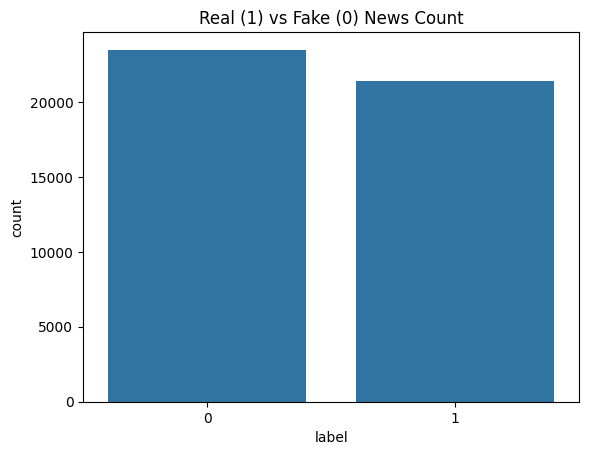

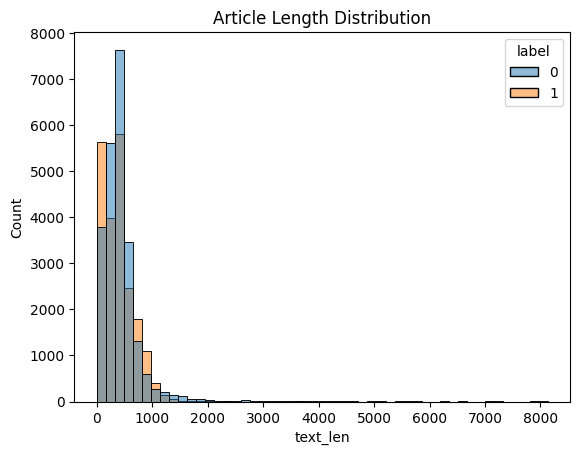

In [3]:
print("Shape:", df.shape)
print(df['label'].value_counts())

# Visualize class balance
sns.countplot(x='label', data=df)
plt.title("Real (1) vs Fake (0) News Count")
plt.show()

# Length of articles
df['text_len'] = df['text'].apply(lambda x: len(str(x).split()))
sns.histplot(data=df, x='text_len', hue='label', bins=50)
plt.title("Article Length Distribution")
plt.show()


In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stop = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [stemmer.stem(w) for w in words if w not in stop]
    return ' '.join(words)

df['clean_text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text']).toarray()
y = df['label']


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      4710
           1       0.93      0.92      0.92      4270

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



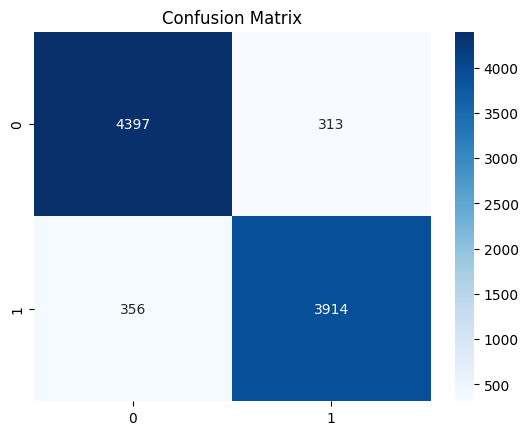

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [7]:
from sklearn.model_selection import train_test_split

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


🔸 Logistic Regression Report:

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4710
           1       0.98      0.99      0.98      4270

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



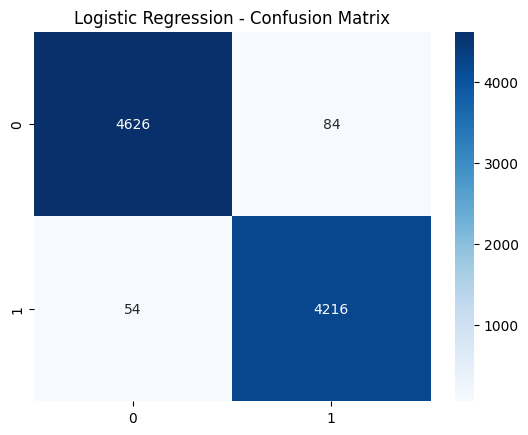

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

print("🔸 Logistic Regression Report:\n")
print(classification_report(y_test, y_pred_log))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


🔸 Random Forest Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4710
           1       1.00      1.00      1.00      4270

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



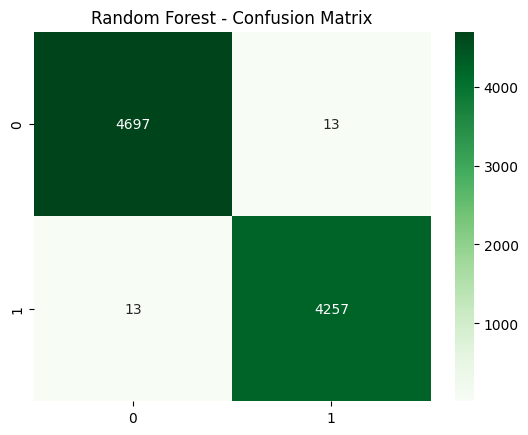

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("🔸 Random Forest Report:\n")
print(classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest - Confusion Matrix")
plt.show()


In [10]:
!pip install xgboost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:08:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔸 XGBoost Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4710
           1       1.00      1.00      1.00      4270

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



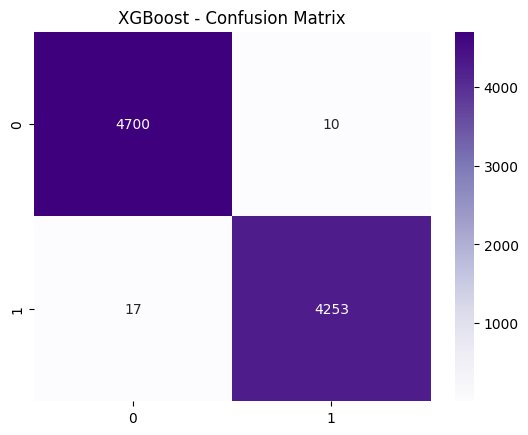

In [11]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("🔸 XGBoost Report:\n")
print(classification_report(y_test, y_pred_xgb))

sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Purples')
plt.title("XGBoost - Confusion Matrix")
plt.show()


In [12]:
from sklearn.metrics import accuracy_score

print("Accuracy Scores:")
print("Logistic Regression:", accuracy_score(y_test, y_pred_log))
print("Random Forest:      ", accuracy_score(y_test, y_pred_rf))
print("XGBoost:            ", accuracy_score(y_test, y_pred_xgb))


Accuracy Scores:
Logistic Regression: 0.9846325167037862
Random Forest:       0.9971046770601336
XGBoost:             0.9969933184855234


In [13]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
param_grid_log = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}

grid_log = GridSearchCV(logreg, param_grid_log, cv=5, scoring='accuracy', n_jobs=-1)
grid_log.fit(X_train, y_train)

print("🔹 Best Logistic Regression Params:", grid_log.best_params_)


🔹 Best Logistic Regression Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [17]:
df['predicted_label'] = model.predict(X)  # for your chosen model
df['predicted_news_type'] = df['predicted_label'].map({0: 'Fake', 1: 'Real'})
df.to_csv("News_with_Predictions.csv", index=False)


In [19]:
df['predicted_label'] = model.predict(X)
df['predicted_news_type'] = df['predicted_label'].map({0: 'Fake', 1: 'Real'})
df[['title', 'text', 'predicted_news_type']].head(10)


,title,text,predicted_news_type
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",Fake
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,Real
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,Real
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",Fake
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",Real
5,Paul Ryan Responds To Dem’s Sit-In On Gun Con...,"On Wednesday, Democrats took a powerful stance...",Fake
6,AWESOME! DIAMOND AND SILK Rip Into The Press: ...,President Trump s rally in FL on Saturday was ...,Fake
7,STAND UP AND CHEER! UKIP Party Leader SLAMS Ge...,He s been Europe s version of the outspoken Te...,Fake
8,North Korea shows no sign it is serious about ...,WASHINGTON (Reuters) - The State Department sa...,Real
9,Trump signals willingness to raise U.S. minimu...,(This version of the story corrects the figur...,Fake
